<font size="+5" color='#053c96'><h2><center> Sentiment Analysis </h2></center></font>
<figure>
<center><img src ="https://th.bing.com/th/id/OIP.W_mmd2Xnx93yweD2UW3thgHaEm?pid=ImgDet&rs=1" width = "750" height = '600' alt="Financial Fraud Detection"/>

<a id='table-of-contents'></a>
[Table of Contents](#table-of-contents)

- [Introduction](#introduction)
  * [Problem Statement](#problem-statement)
  * [Objectives](#goals)
- [Importing Libraries](#importing-dependencies)
- [Functions](#functions)
- [Data](#data)
- [Exploratory Data Analysis](#exploratory-data-analysis)
  * [Data Preparation](#data-preparation)
  * [Data Cleaning](#data-cleaning)
  * [Data Exploration & Visualization](#data-exploration)
    * [Pre-release](#pre)
    * [Post-release](#post)
- [Sentiment Analysis using Vader](#modeling)
  * [Artists](#artists)
  * [Pre-release](#pre-selection)
  * [Post-release](#post-selection)
  * [All-Tweets](#all-selection)
- [Results](#results)
  * [Analysis Results](#analysis-results)
  * [Implications](#implications)
- [Conclusion](#conclusion)
  * [Summary](#summary)
  * [Limitations](#limitations)
  * [Recommendations](#recommendations)

<a id='introduction'></a>
<font size="+4" color='#053c96'><b> Introduction</b></font>  
[back to top](#table-of-contents)  

This project aims to develop a Python-based social media sentiment analysis that allows clients to analyze comments or users' interactions with social media accounts of musicians before and after they release their music. The project will collect data from various social media platforms, clean and preprocess the data, perform sentiment analysis, and display the collected data in a visually appealing and easy-to-read format. The project will provide insights on frequently used words, hashtags, users, and comment sentiment. The project will ensure that the analysis is performed on high-quality data, leading to more accurate results.

<a id='problem-statement'></a>
<font size="+3" color='#780404'><b> Problem Statement</b></font>  
[back to top](#table-of-contents)  

This project aims to address the need for a comprehensive social media sentiment analysis tool for the client. By collecting and analyzing data from various social media platforms, the tool will provide insights on frequently used words, hashtags, users, and comment sentiment before and after a music release.

<a id='goals'></a>
<font size="+3" color='#780404'><b> Objectives</b></font>  
[back to top](#table-of-contents)  

- Collect data from various social media platforms within a specific time frame before and after the music release date.
- Preprocess the collected data by removing unnecessary characters, handling missing data, removing stop words, and performing other transformations to prepare the data for sentiment analysis.
- Use NLTK's Vader to perform sentiment analysis on each comment and classify them as positive, negative or neutral.
- Provide insights on frequently used words, hashtags, users, and comment sentiment to help the client analyze social media posts of musicians.
- Develop a visually appealing and easy-to-read notebook that displays the collected data in the form of graphs, charts, and other visualizations to enable the client to quickly analyze the data and gain insights.

<a id='importing-dependencies'></a>
<font size="+4" color='#053c96'><b> Importing Libraries</b></font>  
[back to top](#table-of-contents)

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # plot style
from wordcloud import WordCloud
pd.options.display.float_format = '{:.0f}'.format

# Libraries for Natural Language Processing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TreebankWordTokenizer
from nltk import SnowballStemmer, PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
#from nltk.util import ngrams
import re
import contractions # for word contractions
import string
import emoji

import warnings
warnings.filterwarnings('ignore')

<a id='functions'></a>
<font size="+4" color='#053c96'><b> Functions</b></font>  
[back to top](#table-of-contents)  

Here are the functions that have been defined for this project:

- drop_columns(df): This function drops unnecessary columns from a given DataFrame.
- drop_null_tweets(df): This function removes any rows with null values in the Tweet_Content column of a given DataFrame.
- add_artist(df, name): This function adds an Artist column to a given DataFrame and fills it with the specified name.
- combine_dataframes(dfs): This function combines a list of DataFrames into one DataFrame.
- clean_column(column): This function cleans text data by converting to lowercase, removing non-ASCII characters, removing URLs, removing punctuation, and removing numbers.
- text_preproc(x): This function standardizes text data by expanding contractions, removing extra spaces and newlines.
- emoji_converter(x): This function converts emojis to words, removes hashtags, user names, and stop words from text data.
- extract_hashtags(df, column): This function extracts hashtags from a given column of a DataFrame and returns a DataFrame containing the hashtags and their occurrences.
- extract_users(df, column): This function extracts user names from a given column of a DataFrame and returns a DataFrame containing the user names and their occurrences.
- plot_hashtags(df, name): This function plots the hashtags extracted from a DataFrame using extract_hashtags.
- get_sentiment_label(tweet): This function uses the VADER Sentiment Analyzer to determine the sentiment of a given tweet and returns a label of 'Positive', 'Negative', or 'Neutral'.

In [2]:
def drop_columns(df):
    """The drop_columns function takes a DataFrame as input and drops several columns deemed unnecessary for our analysis.
    The function returns the updated DataFrame with the specified columns removed."""
    
    df = df.drop(['url', 'content', 'hashtag', 'like_num','comment_num'], axis=1)
    return df

In [3]:
def drop_null_tweets(df, col):
    """Drop rows with missing values in the 'Tweet_Content' column of the given DataFrame.

    Args:
    df (pandas.DataFrame): Input DataFrame.

    Returns:
    pandas.DataFrame: DataFrame with missing values in 'Tweet_Content' column removed.
    """
    df = df.dropna(subset=[col], axis=0)
    return df

In [4]:
def combine_dataframes(dfs):
    """The combine_dataframes function takes a list of dataframes as input and concatenates them into a single dataframe.

    Args:

    dfs: a list of pandas dataframes to be combined
    Returns:

    combined_df: a single pandas dataframe with all the rows from the input dataframes
    The function iterates through each dataframe in the input list,
    and uses the append() method to concatenate it to the previously combined dataframe.
    It also sets ignore_index=True to ensure that the row indexes are reset in the final dataframe.
    Finally, it returns the concatenated dataframe."""
    combined_df = pd.DataFrame()  # create an empty dataframe to start with
    for df in dfs:
        combined_df = combined_df.append(df, ignore_index=True)  # append the rows of the current dataframe to the previous one
    return combined_df


In [5]:
#function to remove noise from dataframe

def clean_column(column):
    """The function clean_column(column) removes noise from a given column of a DataFrame by
    converting the text to lowercase,
    removing web URLs, removing punctuation,
    removing numbers and converting unicode characters into binary strings.
    The cleaned column is returned."""
    #convert to lowercase()
    column = column.str.lower()
    #convert unicode characters into binary string
    column = column.str.encode('ascii', 'ignore').str.decode("utf-8")
    #removes web URL from text
    column = column.str.replace(r'https*\S+', 'url ', regex=True)
    #removes "\" from string
    column = column.str.replace(r'\'\w+', ' ', regex=True)
    
    column = column.str.replace(r'([A-Za-z])\1{2,}', r'\1', regex=True)
    # removes punctuation from string
    column = column.str.replace('[%s]' % re.escape(string.punctuation), ' ', regex=True)
    # removes numbers from string
    column = column.str.replace(r'\w*\d+\w*', ' ', regex=True)
    return column

In [6]:
def text_preproc(x):
    """The function text_preproc takes an input and performs the following text pre-processing steps:
    It expands contractions using the contractions package.
    It replaces multiple spaces with a single space using regular expressions.
    It replaces newline characters with a single space using regular expressions.
    """
    x = ' '.join([contractions.fix(word) for word in x.split()])
    x = re.sub(' +', ' ', x)
    x = re.sub('\n', ' ', x)
    return x

The ***text_preproc*** function changes all the contradictions (*e.g don't **to** do not **and** there's **to** there is*), and removes extra whitespaces

In [7]:
def emoji_converter(x):
    """The function emoji_converter takes in a string of text as input,
    converts emojis to words,
    removes hashtags and user names,
    and then removes stopwords.
    The function returns the preprocessed string.
    """
    # Convert emojis to words
    x = ' '.join([emoji.demojize(word) for word in x.split()])
    # Remove hashtags
    x = re.sub(r'#\w+', '', x)
    # Remove user names
    x = re.sub(r'@\w+', '', x)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    x = ' '.join([word for word in x.split() if word.lower() not in stop_words])
    return x

In [8]:
def plot_sentiment_distribution(df, column):
    sns.countplot(data=df, x=column)

In [9]:
def hashtags_column(df, column):
    """
    This function takes a DataFrame and a column name as input and extracts hashtags from the text in that column.
    It returns a DataFrame with a new column 'hashtags' containing all the hashtags found in the text.
    """
    df['hashtags'] = df[column].apply(lambda x: re.findall('(#\w+)', x.lower()))
    return df

In [10]:
def extract_username_from_twitter_url(url):
    """
    This function takes a Twitter profile URL as input and extracts the username from it.
    It returns the extracted username.
    """
    pattern = r"https?://twitter.com/(\w+)"
    match = re.search(pattern, url)
    if match:
        return match.group(1)
    else:
        return None

def extract_username(df, column):
    """
    This function takes a DataFrame and a column name as input.
    It extracts Twitter usernames from the URLs in the specified column and adds a new column 'users' to the DataFrame.
    """
    df['users'] = df[column].apply(lambda x: extract_username_from_twitter_url(x))
    return df


In [11]:
def extract_hashtags(df, column):
    """
    This function takes a DataFrame and a column name as input and extracts hashtags from the text in that column.
    It returns a DataFrame with two columns - 'hashtag' and 'occurrences'.
    The 'hashtag' column contains the hashtag text and
    the 'occurrences' column contains the number of times that hashtag appears in the text.
    """
    hashtags = df[column].apply(lambda x: pd.value_counts(re.findall('(#\w+)', x.lower() )))\
                     .sum(axis=0)\
                     .to_frame()\
                     .reset_index()\
                     .sort_values(by=0,ascending=False)
    hashtags.columns = ['hashtag','occurences']
    return hashtags

In [12]:
def extract_users(df, column):
    """
    The function extract_users takes a dataframe and a column name as input,
    and returns a dataframe with two columns - the username
    and the number of times it occurs in the specified column of the input dataframe.
    It uses regular expressions to find all mentions of usernames (starting with '@')
    and then counts the number of occurrences for each unique username.
    The resulting dataframe is sorted in descending order of occurrence count.
    """
    users= df[column].apply(lambda x: pd.value_counts(re.findall('(@[A-Za-z0-9]+)', x.lower() )))\
                     .sum(axis=0)\
                     .to_frame()\
                     .reset_index()\
                     .sort_values(by=0,ascending=False)
    users.columns = ['user','occurences']
    return users

In [13]:
def plot_hashtags(df, name):
    df.plot(fontsize=10,figsize  = (10,5), kind='bar',y='occurences',x='hashtag')
    plt.xticks(rotation = 90)
    plt.tight_layout()
    plt.grid(False)
    plt.suptitle(f'Hashtags for {name} posts', fontsize=14);

In [14]:
def plot_users(df, name):
    df[:50].plot(fontsize=10,figsize  = (10,5), kind='bar',y='occurences',x='user')
    plt.xticks(rotation = 90, fontsize=14)
    plt.tight_layout()
    plt.grid(False)
    plt.suptitle(f'Top Users mention in {name} posts', fontsize=14);

In [15]:
def plot_wordcloud(df, name):
    all_tweets = " ".join(word for word in df.comment)
    fig, ax = plt.subplots(1, 1, figsize  = (10,10))
    # Create and generate a word cloud image:
    wordcloud_all = WordCloud(max_font_size=100, max_words=100, background_color="black").generate(all_tweets)
    # Display the generated image:
    ax.imshow(wordcloud_all, interpolation='bilinear')
    ax.set_title(f'WordCloud for {name} posts', fontsize=14)
    ax.axis('off');

In [16]:
def get_sentiment_label(tweet):
    """
    This function takes in a tweet as input,
    performs sentiment analysis on it using the VADER
    (Valence Aware Dictionary and Sentiment Reasoner) sentiment analysis tool,
    and returns a sentiment label for the tweet (Positive, Negative or Neutral)
    based on the compound score calculated by VADER.
    """
    sid = SentimentIntensityAnalyzer()
    scores = sid.polarity_scores(tweet)
    if scores['compound'] >= 0.05:
        return 'Positive'
    elif scores['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

<a id='data'></a>
<font size="+4" color='#053c96'><b> Data</b></font>  
[back to top](#table-of-contents)

Data was scraped from Twitter, TikTok and YouTube using Octoparse software

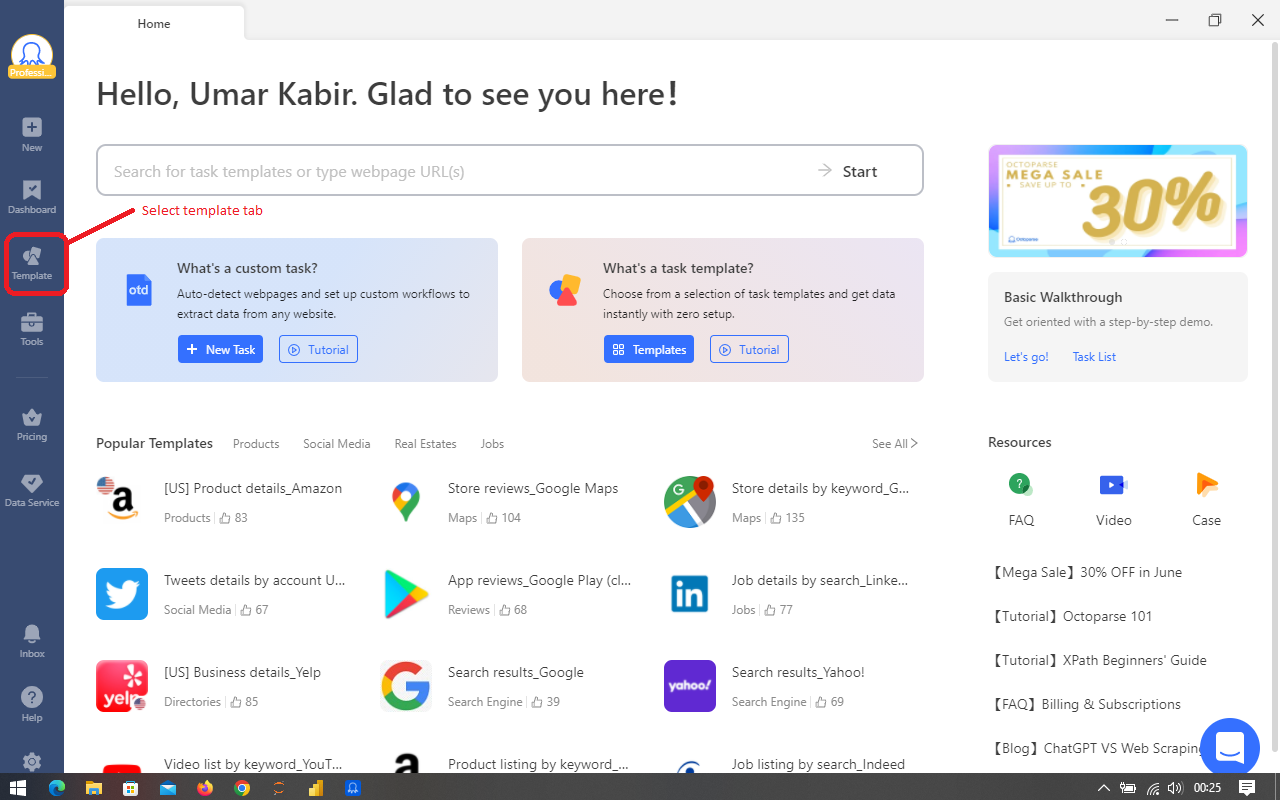

![pic1.png](attachment:pic1.png)

![pic2.png](attachment:pic2.png)

In [17]:
beyonce_announcement = pd.read_csv('Data/beyonce_renaissance_announcement.csv')
beyonce_release = pd.read_csv('Data/beyonce_renaissance_release.csv')

1. beyonce_announcement contains comments and replies from Beyonce's post:   
   *****"Seeing y’all release the wiggle made me so happy! Thank you so much for all the love for BREAK MY SOUL! - Love B —#RENAISSANCE #B REAKMYSOUL"*****     which announced her album RENAISSANCE on 2022-7-14  

2. beyonce_release contains comments and replies from Byonce's post:  
       *****RENAISSANCE…*****     which is the release of her album RENAISSANCE on 2022-7-29

In [18]:
jb_announcement = pd.read_csv('Data/jonasbrothers_thealbum.csv')
jb_release = pd.read_csv('Data/jonasbrothers_thealbum_release.csv')

1. jb_announcement contains comments and replies from Jonas Brother's post:   
   *****THE ALBUM. May 5th. Pre-save now at jonasbrothers.com*****   which announced their album THE ALBUM  


2. jb_release contains comments and replies from Jonas Brother's post:   
   *****The journey this record has taken us on has been a one of a kind experience and finally getting to share these songs with you means the world to us. Thank you to the incredible @Jon Bellion  for helping us bring this body of work to life. We’re so proud of these songs and hope you love it as much as we do. THE ALBUM is yours now! #thealbum  #newmusic*****   
   which is the release of their album THE ALBUM  

The above code reads in several CSV files containing data related to music album announcements and releases. The data includes information such as the artist, the content of the post, the date of the post, and other relevant details. This data will be used for analysis and visualization in the project.

<a id='data'></a>
<font size="+4" color='#053c96'><b> Exploratory Data Analysis</b></font>  
[back to top](#table-of-contents)

In [19]:
beyonce_announcement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   url             804 non-null    object
 1   poster          804 non-null    object
 2   post_date       804 non-null    object
 3   content         804 non-null    object
 4   hashtag         804 non-null    object
 5   like_num        804 non-null    object
 6   comment_num     804 non-null    object
 7   comment_person  804 non-null    object
 8   comment         804 non-null    object
 9   comment_date    804 non-null    object
dtypes: object(10)
memory usage: 62.9+ KB


In [20]:
beyonce_announcement.head()

url   poster  post_date  \
0  https://www.tiktok.com/@beyonce/video/71202244...  beyonce  2022-7-14   
1  https://www.tiktok.com/@beyonce/video/71202244...  beyonce  2022-7-14   
2  https://www.tiktok.com/@beyonce/video/71202244...  beyonce  2022-7-14   
3  https://www.tiktok.com/@beyonce/video/71202244...  beyonce  2022-7-14   
4  https://www.tiktok.com/@beyonce/video/71202244...  beyonce  2022-7-14   

                                             content  \
0  Seeing y’all release the wiggle made me so hap...   
1  Seeing y’all release the wiggle made me so hap...   
2  Seeing y’all release the wiggle made me so hap...   
3  Seeing y’all release the wiggle made me so hap...   
4  Seeing y’all release the wiggle made me so hap...   

                                             hashtag like_num comment_num  \
0  Seeing y’all release the wiggle made me so hap...     1.5M       21.8K   
1  Seeing y’all release the wiggle made me so hap...     1.5M       21.8K   
2  Seeing y’all release the wiggle made me so hap...     1.5M       21.8K   
3  Seeing y’all release the wiggle made me so hap...     1.5M       21.8K   
4  Seeing y’all release the wiggle made me so hap...     1.5M       21.8K   

     comment_person                                        comment  \
0         Katalina   Imagine being on Beyoncés page I would perish   
1      Favoritewcw                                           BAE??   
2  ChannDaily 🏳️‍🌈                                     BEYONCE!!??   
3           Keem ✅                 The fact Beyoncé gave credit 🐐🔥   
4           Shenee                             Queen!!! Hello!!!!!   

  comment_date  
0    2022-8-10  
1    2022-7-14  
2    2022-7-14  
3    2022-7-20  
4    2022-7-14

In [21]:
beyonce_announcement.describe(include='O')

url   poster  post_date  \
count                                                 804      804        804   
unique                                                  2        1          1   
top     https://www.tiktok.com/@beyonce/video/71202244...  beyonce  2022-7-14   
freq                                                  803      804        804   

                                                  content  \
count                                                 804   
unique                                                  1   
top     Seeing y’all release the wiggle made me so hap...   
freq                                                  804   

                                                  hashtag like_num  \
count                                                 804      804   
unique                                                  1        1   
top     Seeing y’all release the wiggle made me so hap...     1.5M   
freq                                                  804      804   

       comment_num  comment_person  comment comment_date  
count          804             804      804          804  
unique           1             759      782          151  
top          21.8K  Denise Cherry   BEYONCÉ    2022-7-14  
freq           804               4        5          296

<a id='cleaning'></a>
<font size="+3" color='#780404'><b> Data Cleaning</b></font>  
[back to top](#table-of-contents)  

In [22]:
beyonce_announcement = drop_columns(beyonce_announcement)
beyonce_release = drop_columns(beyonce_release)
jb_announcement = drop_columns(jb_announcement)
jb_release = drop_columns(jb_release)

The code above drops some unnecessary columns from each of the dataframes

In [23]:
beyonce_announcement = drop_null_tweets(beyonce_announcement, 'comment')
beyonce_release = drop_null_tweets(beyonce_release, 'comment')
jb_announcement = drop_null_tweets(jb_announcement, 'comment')
jb_release = drop_null_tweets(jb_release, 'comment')

The code above drops all the rows that have empty tweets from each of the dataframes

In [24]:
beyonce_announcement = hashtags_column(beyonce_announcement, 'comment')
beyonce_release = hashtags_column(beyonce_release, 'comment')
jb_announcement = hashtags_column(jb_announcement, 'comment')
jb_release = hashtags_column(jb_release, 'comment')

<a id='prep'></a>
<font size="+3" color='#780404'><b> Data Preparation</b></font>  
[back to top](#table-of-contents)  

In [25]:
beyonce_df = combine_dataframes([beyonce_announcement, beyonce_release])

In [26]:
jb_df = combine_dataframes([jb_announcement, jb_release])

In [27]:
announcement_df = combine_dataframes([beyonce_announcement, jb_announcement])

In [28]:
announcement_df['type'] = 'pre-release'

In [29]:
release_df = combine_dataframes([beyonce_release, jb_release])

In [30]:
release_df['type'] = 'post-release'

In [31]:
all_df = combine_dataframes([announcement_df, release_df])

<a id='prep'></a>
<font size="+3" color='#780404'><b> Data Exploration & Visualization</b></font>  
[back to top](#table-of-contents)  

<a id='prep'></a>
<font size="+2" color='purple'><b> Pre-release</b></font>  
[back to top](#table-of-contents)  

<font size="+2" color='turquoise'><b> Beyonce</b></font>  

### We are going to look into the Beyonce announcement post, the hashtags, users mention and frequent words using Wordcloud

In [32]:
beyonce_announcement_hashtags = extract_hashtags(beyonce_announcement, 'comment')
beyonce_announcement_users = extract_users(beyonce_announcement, 'comment')

This code block extracted hashtags and users from the pre-release tweet of the artist

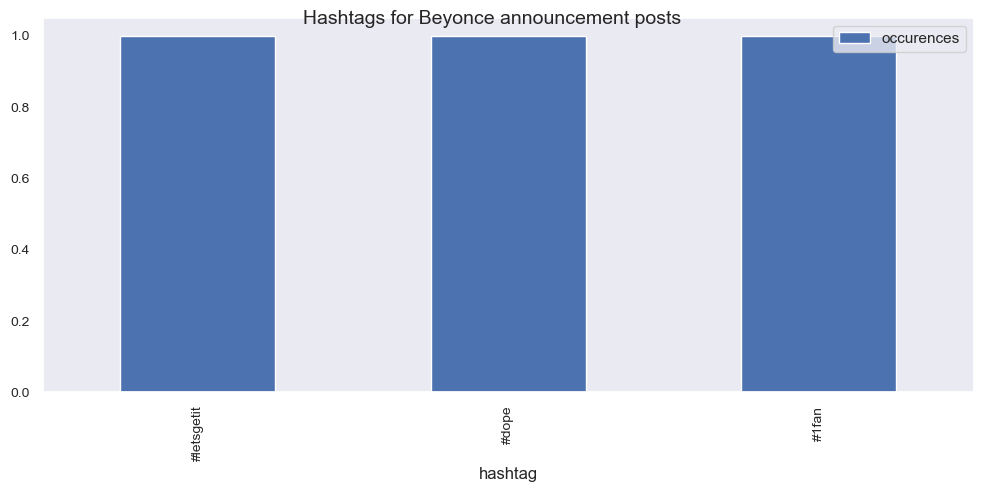

In [33]:
plot_hashtags(beyonce_announcement_hashtags, "Beyonce announcement")

In [34]:
plot_users(beyonce_announcement_users, "Beyonce announcement")

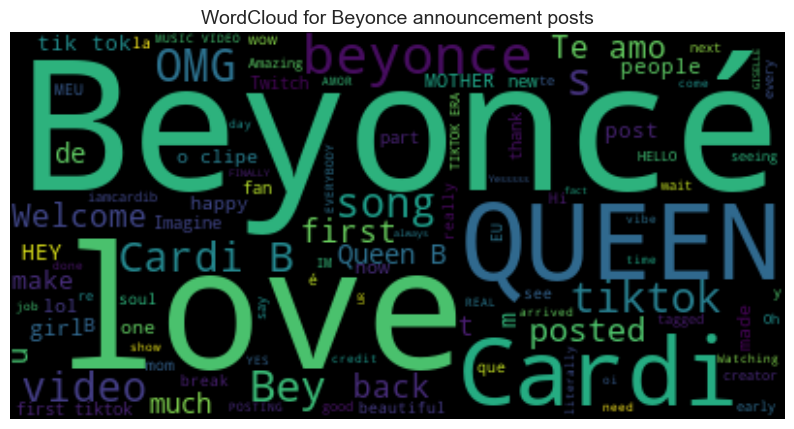

In [35]:
plot_wordcloud(beyonce_announcement, "Beyonce announcement")

<font size="+2" color='turquoise'><b> Jonas Brothers</b></font>  

### We are going to look into the Jonas Brothers announcement post, the hashtags, users mention and frequent words using Wordcloud

In [36]:
jb_announcement_hashtags = extract_hashtags(jb_announcement, 'comment')
jb_announcement_users = extract_users(jb_announcement, 'comment')

This code block extracted hashtags and users from the pre-release tweet of the artist

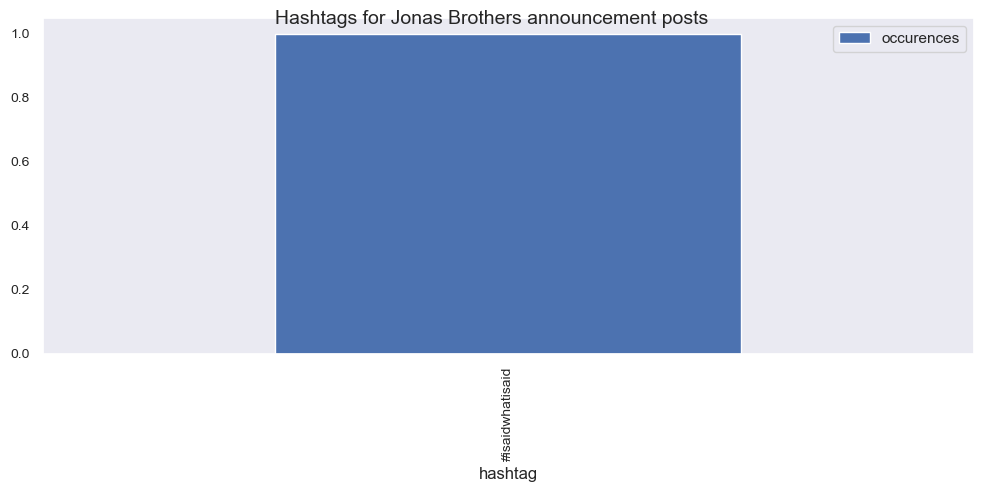

In [37]:
plot_hashtags(jb_announcement_hashtags, "Jonas Brothers announcement")

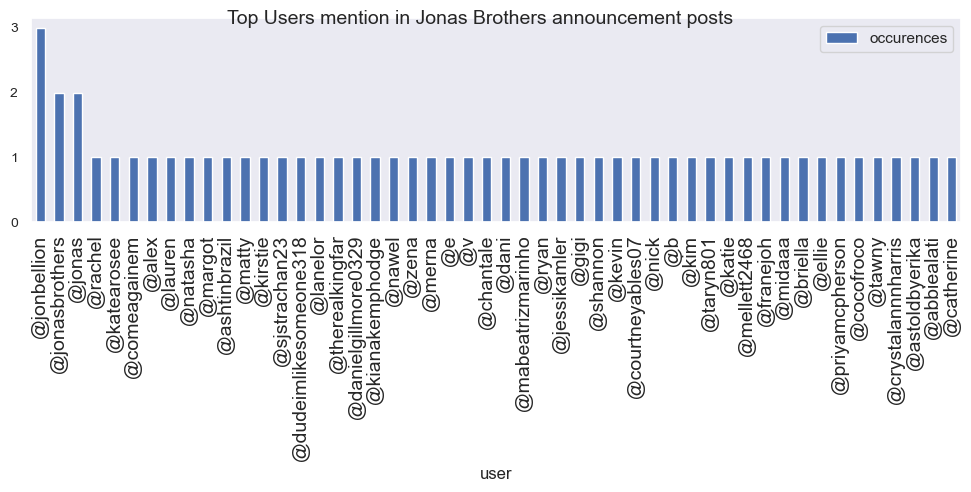

In [38]:
plot_users(jb_announcement_users, "Jonas Brothers announcement")

In [39]:
plot_wordcloud(jb_announcement, "Jonas Brothers announcement")

<font size="+1" color='turquoise'><b> All Pre-release tweets</b></font>      

### We are going to look into the all artists announcement posts combined, the hashtags, users mention and frequent words using Wordcloud

In [40]:
announcement_df_hashtags = extract_hashtags(announcement_df, 'comment')
announcement_df_users = extract_users(announcement_df, 'comment')

In [41]:
plot_hashtags(announcement_df_hashtags, 'all announcements')

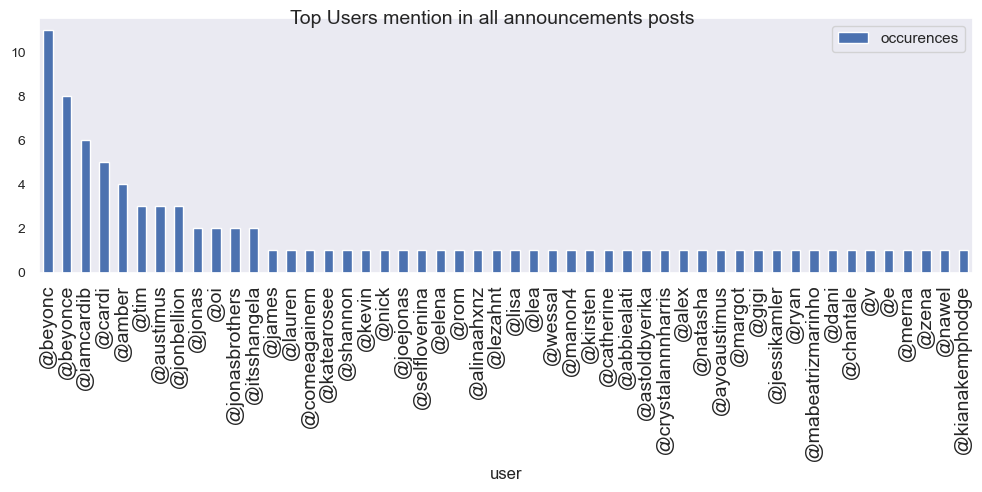

In [42]:
plot_users(announcement_df_users, 'all announcements')

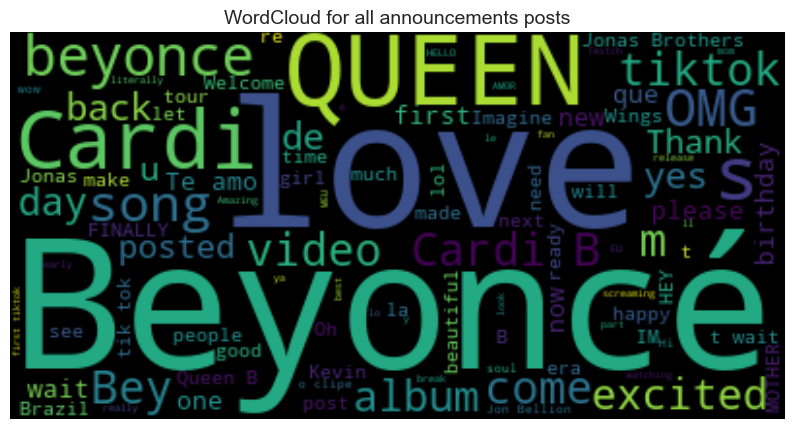

In [43]:
plot_wordcloud(announcement_df, 'all announcements')

<a id='prep'></a>
<font size="+2" color='purple'><b> Post-release</b></font>  
[back to top](#table-of-contents)  

<font size="+1" color='turquoise'><b> Beyonce</b></font>      

### We are going to look into the Beyonce's post-release post, the hashtags, users mention and frequent words using Wordcloud

In [44]:
beyonce_release_hashtags = extract_hashtags(beyonce_release, 'comment')

In [45]:
beyonce_release_users = extract_users(beyonce_release, 'comment')

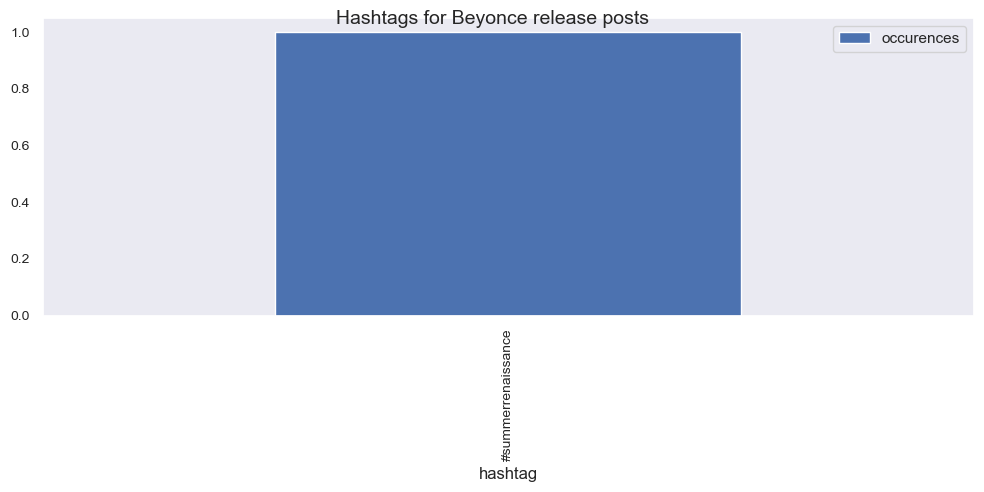

In [46]:
plot_hashtags(beyonce_release_hashtags, "Beyonce release")

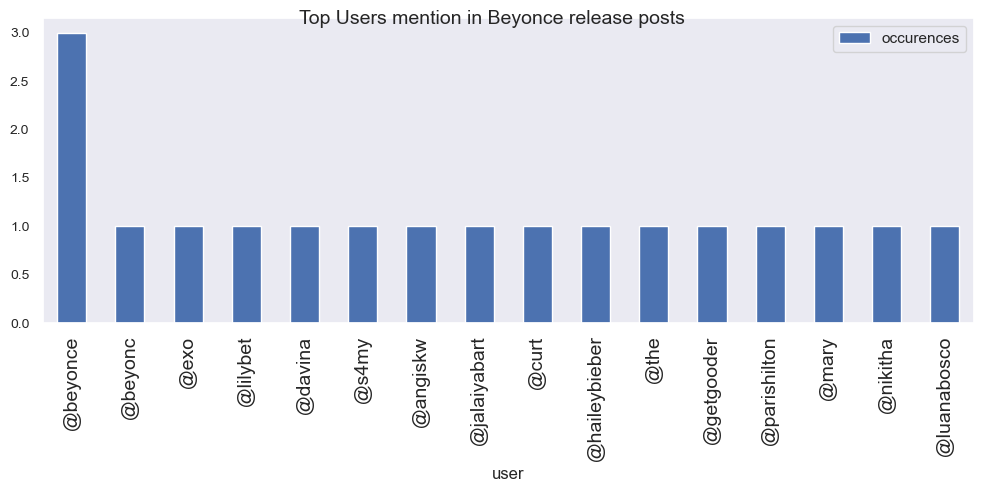

In [47]:
plot_users(beyonce_release_users, "Beyonce release")

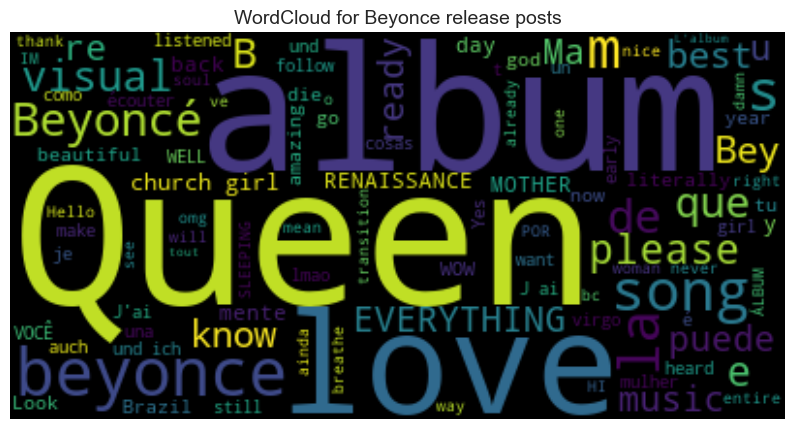

In [48]:
plot_wordcloud(beyonce_release, "Beyonce release")

<font size="+1" color='turquoise'><b> Jonas Brothers</b></font>        

### We are going to look into the Jonas Brothers post-release post, the hashtags, users mention and frequent words using Wordcloud

In [49]:
jb_release_hashtags = extract_hashtags(jb_release, 'comment')
jb_release_users = extract_users(jb_release, 'comment')

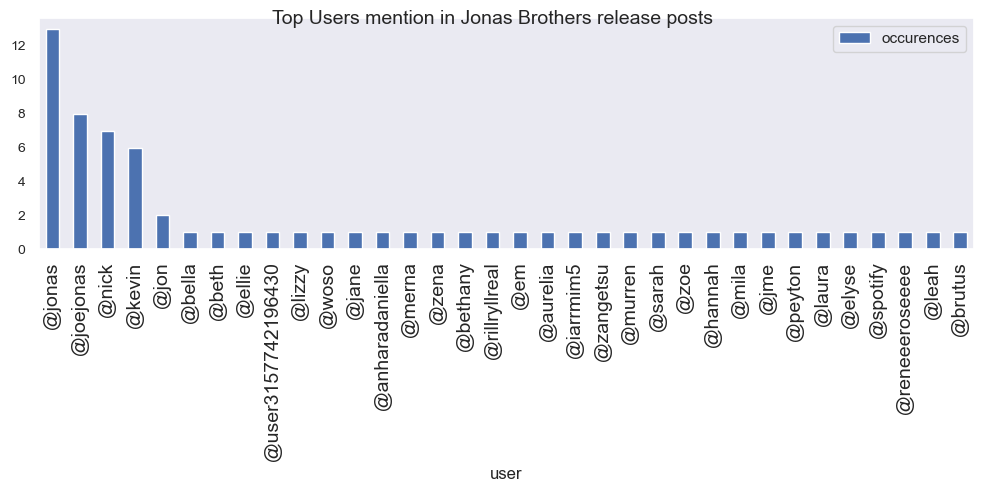

In [50]:
plot_users(jb_release_users, "Jonas Brothers release")

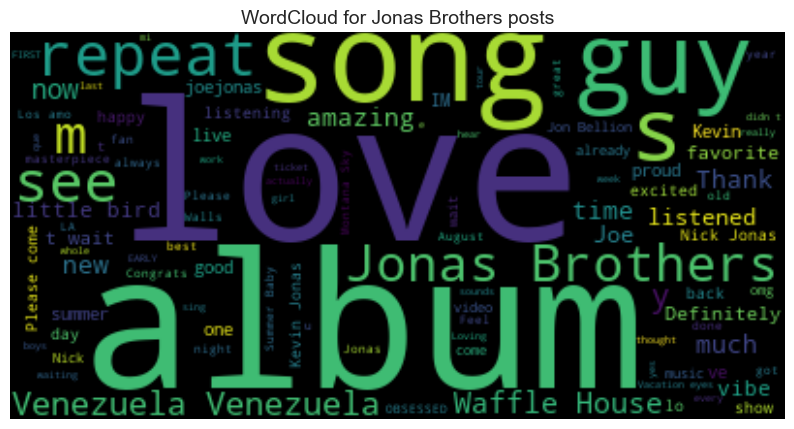

In [51]:
plot_wordcloud(jb_release, "Jonas Brothers")

<font size="+1" color='turquoise'><b> All Post-release tweets</b></font>        

### We are going to look into the all artists post-release posts combined, the hashtags, users mention and frequent words using Wordcloud

In [52]:
release_df_hashtags = extract_hashtags(release_df, 'comment')
release_df_users = extract_users(release_df, 'comment')

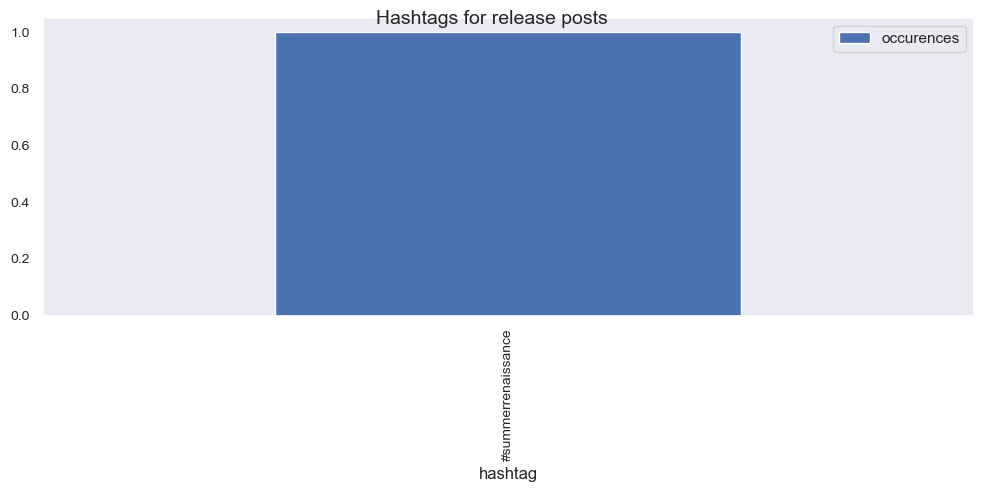

In [53]:
plot_hashtags(release_df_hashtags, 'release')

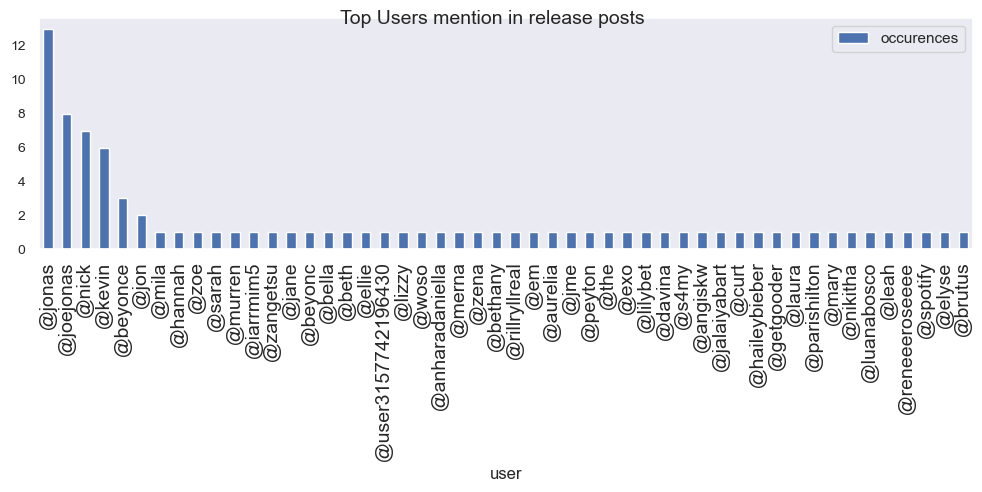

In [54]:
plot_users(release_df_users, 'release')

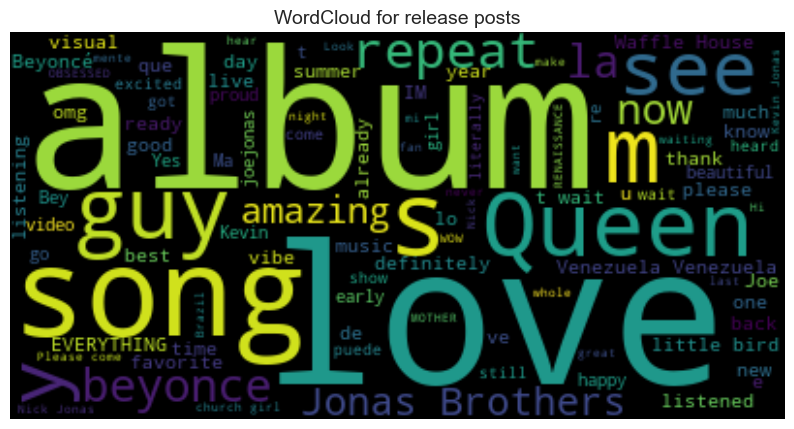

In [55]:
plot_wordcloud(release_df, 'release')

<a id='prep'></a>
<font size="+2" color='purple'><b> Artists Analysis: Pre-release & Post-release combined</b></font>  
[back to top](#table-of-contents)  

<font size="+2" color='turquoise'><b> Beyonce</b></font>        

### We are going to look into the Beyonce's pre & post-release posts combined, the hashtags, users mention and frequent words using Wordcloud

In [56]:
beyonce_df_hashtags = extract_hashtags(beyonce_df, 'comment')

In [57]:
beyonce_df_users = extract_users(beyonce_df, 'comment')

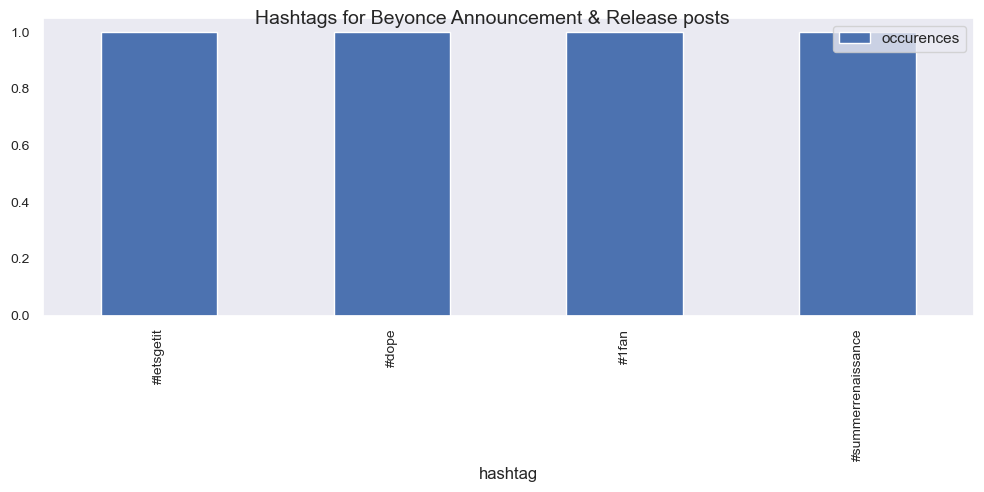

In [58]:
plot_hashtags(beyonce_df_hashtags, "Beyonce Announcement & Release")

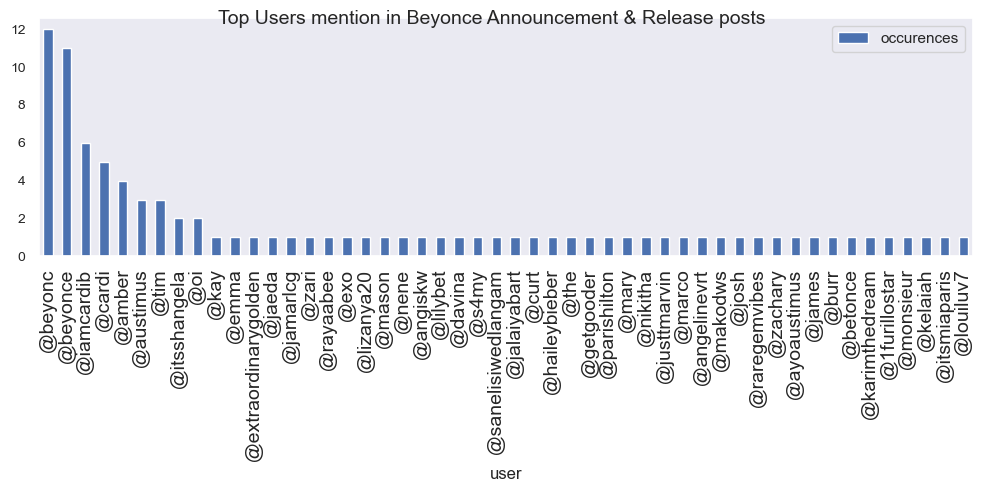

In [59]:
plot_users(beyonce_df_users, "Beyonce Announcement & Release")

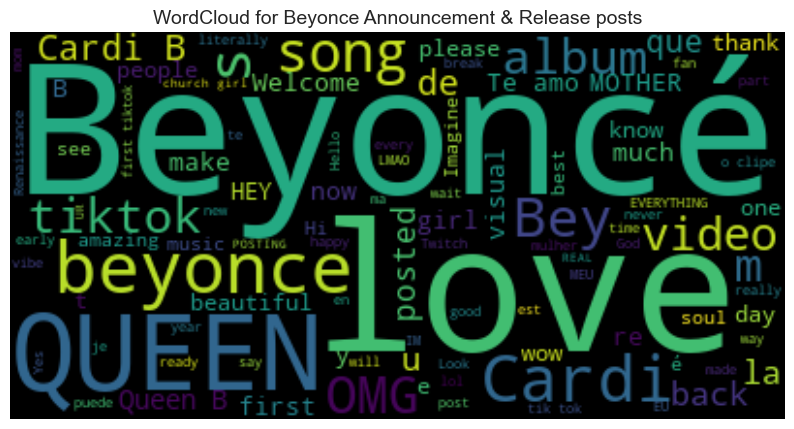

In [60]:
plot_wordcloud(beyonce_df, "Beyonce Announcement & Release")

<font size="+2" color='turquoise'><b> Jonas Brothers</b></font>        

### We are going to look into the Jonas Brother's pre & post-release posts combined, the hashtags, users mention and frequent words using Wordcloud

In [61]:
jb_df_hashtags = extract_hashtags(jb_df, 'comment')
jb_df_users = extract_users(jb_df, 'comment')

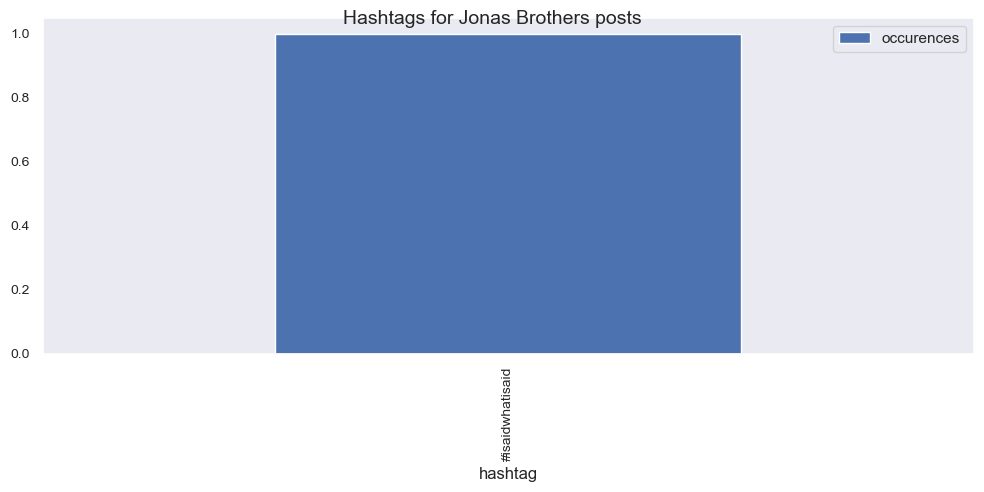

In [62]:
plot_hashtags(jb_df_hashtags, 'Jonas Brothers')

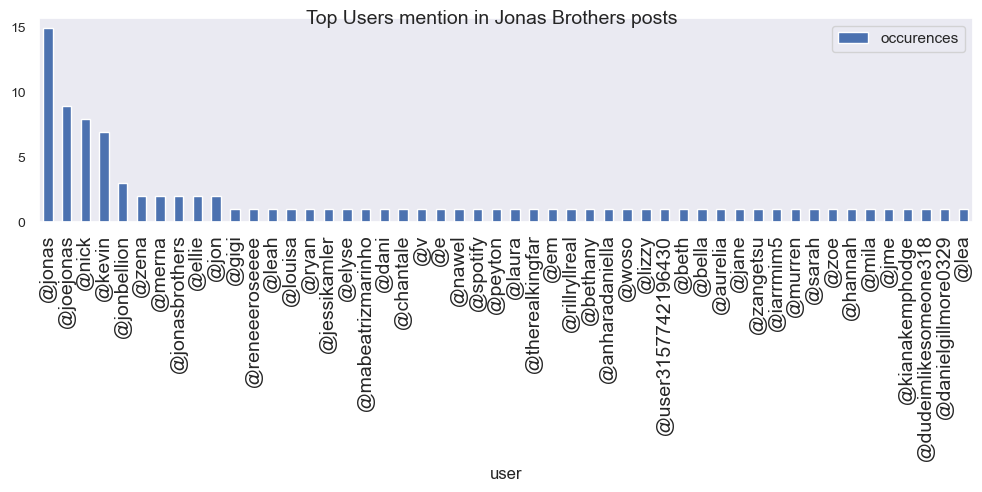

In [63]:
plot_users(jb_df_users, 'Jonas Brothers')

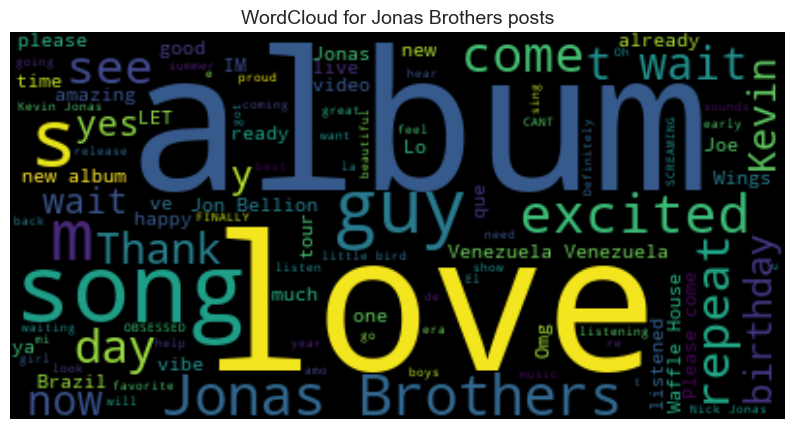

In [64]:
plot_wordcloud(jb_df, 'Jonas Brothers')

<font size="+2" color='turquoise'><b> All Tweets Analysis</b></font>          

### We are going to look into all the tweets we have scraped combined, the hashtags, users mention and frequent words using Wordcloud 

In [65]:
all_df.shape

(2258, 7)

In [66]:
all_df_hashtags = extract_hashtags(announcement_df, 'comment')
all_df_users = extract_users(announcement_df, 'comment')

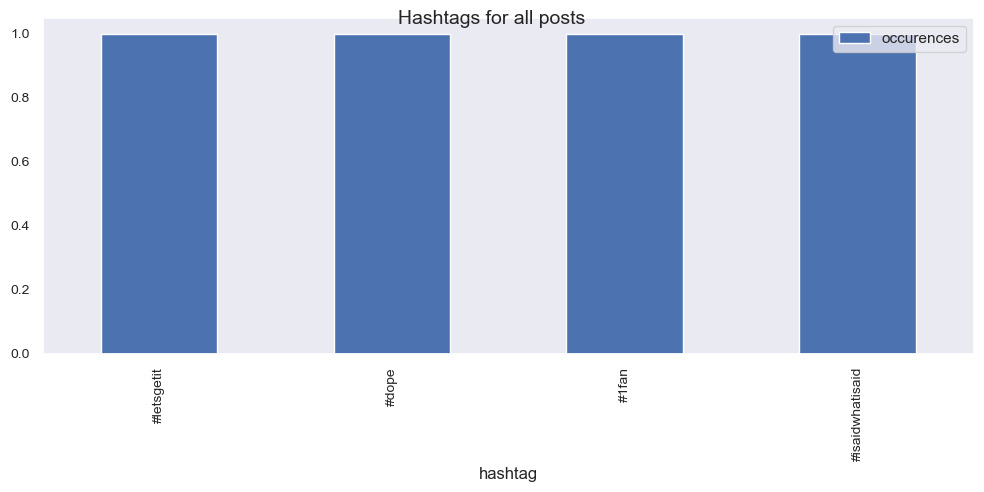

In [67]:
plot_hashtags(all_df_hashtags, 'all')

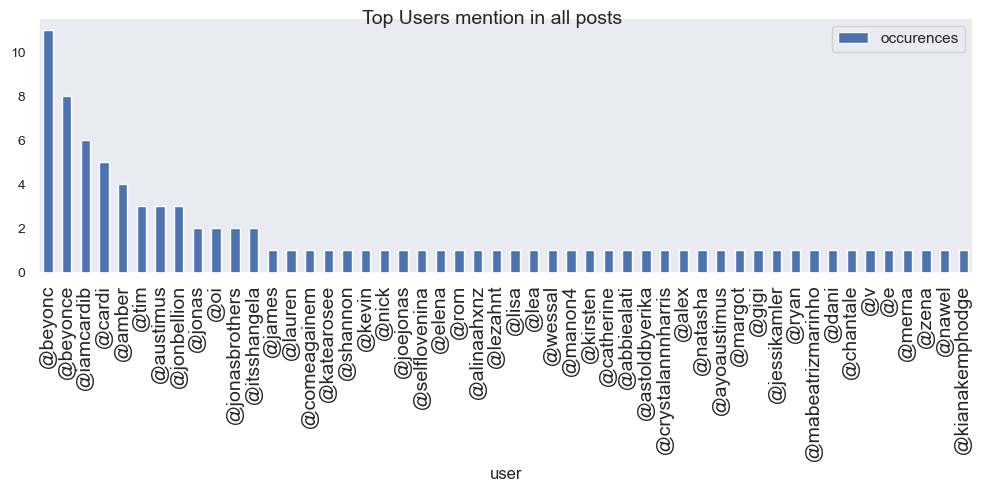

In [68]:
plot_users(all_df_users, 'all')

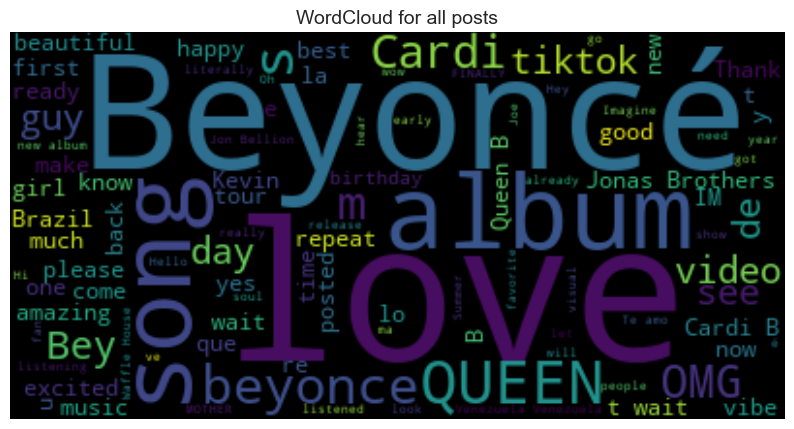

In [69]:
plot_wordcloud(all_df, 'all')

<a id='modeling'></a>
<font size="+4" color='#053c96'><b> Sentiment Analysis using Vader</b></font>  
[back to top](#table-of-contents)           

### In this section we are going to look into the sentiments of users in our datasets in the following order:

* pre & post-release tweets for each artist
* all pre-release tweets
* all post-release tweets
* all tweets combined

<a id='prep'></a>
<font size="+3" color='#780404'><b> Artists</b></font>  
[back to top](#table-of-contents)  

<font size="+2" color='purple'><b> Beyonce</b></font>  

In [70]:
beyonce_announcement['comment'] = beyonce_announcement.comment.apply(text_preproc)
beyonce_announcement['comment'] = clean_column(beyonce_announcement['comment'])
beyonce_announcement['comment'] = beyonce_announcement.comment.apply(emoji_converter)
beyonce_announcement['Sentiment'] = beyonce_announcement['comment'].apply(get_sentiment_label)

beyonce_release['comment'] = beyonce_release.comment.apply(text_preproc)
beyonce_release['comment'] = clean_column(beyonce_release['comment'])
beyonce_release['comment'] = beyonce_release.comment.apply(emoji_converter)
beyonce_release['Sentiment'] = beyonce_release['comment'].apply(get_sentiment_label)

beyonce_df['comment'] = beyonce_df.comment.apply(text_preproc)
beyonce_df['comment'] = clean_column(beyonce_df['comment'])
beyonce_df['comment'] = beyonce_df.comment.apply(emoji_converter)
beyonce_df['Sentiment'] = beyonce_df['comment'].apply(get_sentiment_label)

#### Users Sentiments in Beyonce's pre-release post data

In [71]:
beyonce_announcement['Sentiment'].value_counts()

Neutral     529
Positive    245
Negative     30
Name: Sentiment, dtype: int64

#### Users Sentiments in Beyonce's post-release post data

In [72]:
beyonce_release['Sentiment'].value_counts()

Neutral     326
Positive    135
Negative     23
Name: Sentiment, dtype: int64

#### Users Sentiments in Beyonce's pre & post-release tweet data with barchart

In [73]:
beyonce_df['Sentiment'].value_counts()

Neutral     855
Positive    380
Negative     53
Name: Sentiment, dtype: int64

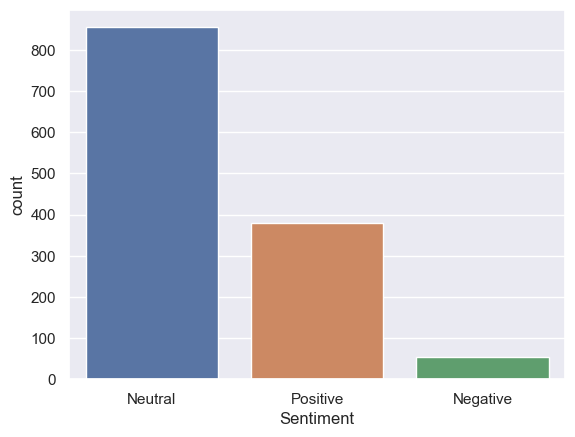

In [74]:
plot_sentiment_distribution(beyonce_df, 'Sentiment')

<font size="+2" color='purple'><b> Jonas Brothers</b></font>  

In [75]:
jb_announcement['comment'] = jb_announcement.comment.apply(text_preproc)
jb_announcement['comment'] = clean_column(jb_announcement['comment'])
jb_announcement['comment'] = jb_announcement.comment.apply(emoji_converter)
jb_announcement['Sentiment'] = jb_announcement['comment'].apply(get_sentiment_label)

jb_release['comment'] = jb_release.comment.apply(text_preproc)
jb_release['comment'] = clean_column(jb_release['comment'])
jb_release['comment'] = jb_release.comment.apply(emoji_converter)
jb_release['Sentiment'] = jb_release['comment'].apply(get_sentiment_label)

jb_df['comment'] = jb_df.comment.apply(text_preproc)
jb_df['comment'] = clean_column(jb_df['comment'])
jb_df['comment'] = jb_df.comment.apply(emoji_converter)
jb_df['Sentiment'] = jb_df['comment'].apply(get_sentiment_label)

#### Users Sentiments in Jonas Brother's pre-release post data

In [76]:
jb_announcement['Sentiment'].value_counts()

Neutral     321
Positive    146
Negative     26
Name: Sentiment, dtype: int64

#### Users Sentiments in Jonas Brother's post-release postt data

In [77]:
jb_release['Sentiment'].value_counts()

Neutral     237
Positive    211
Negative     29
Name: Sentiment, dtype: int64

#### Users Sentiments in Jonas Brother's pre & post-release postt data with a barchart

In [78]:
jb_df['Sentiment'].value_counts()

Neutral     558
Positive    357
Negative     55
Name: Sentiment, dtype: int64

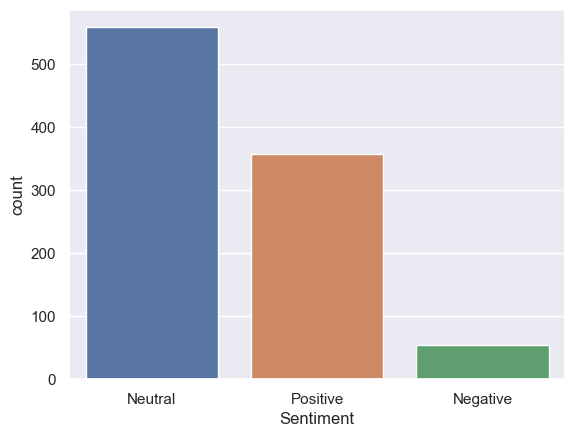

In [79]:
plot_sentiment_distribution(jb_df, 'Sentiment')

<a id='pre'></a>
<font size="+3" color='#780404'><b> Pre-release</b></font>  
[back to top](#table-of-contents)  

In [80]:
announcement_df['comment'] = announcement_df.comment.apply(text_preproc)
announcement_df['comment'] = clean_column(announcement_df['comment'])
announcement_df['comment'] = announcement_df.comment.apply(emoji_converter)
announcement_df['Sentiment'] = announcement_df['comment'].apply(get_sentiment_label)

#### Users Sentiments in all artists pre-release post data combined

In [81]:
announcement_df['Sentiment'].value_counts()

Neutral     850
Positive    391
Negative     56
Name: Sentiment, dtype: int64

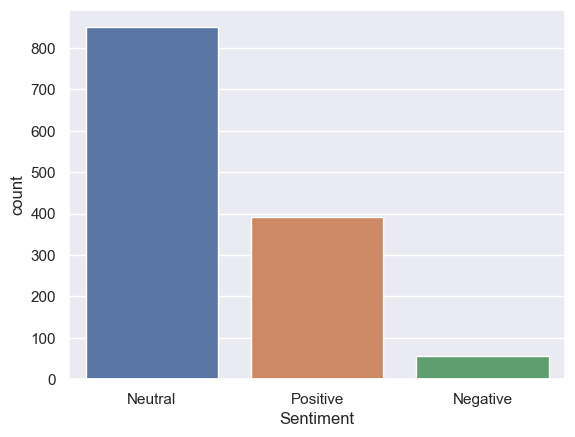

In [82]:
plot_sentiment_distribution(announcement_df, 'Sentiment')

<a id='post'></a>
<font size="+3" color='#780404'><b> Post-release</b></font>  
[back to top](#table-of-contents)  

In [83]:
release_df['comment'] = release_df.comment.apply(text_preproc)
release_df['comment'] = clean_column(release_df['comment'])
release_df['comment'] = release_df.comment.apply(emoji_converter)
release_df['Sentiment'] = release_df['comment'].apply(get_sentiment_label)

#### Users Sentiments in all artists post-release postt data combined

In [84]:
release_df['Sentiment'].value_counts()

Neutral     563
Positive    346
Negative     52
Name: Sentiment, dtype: int64

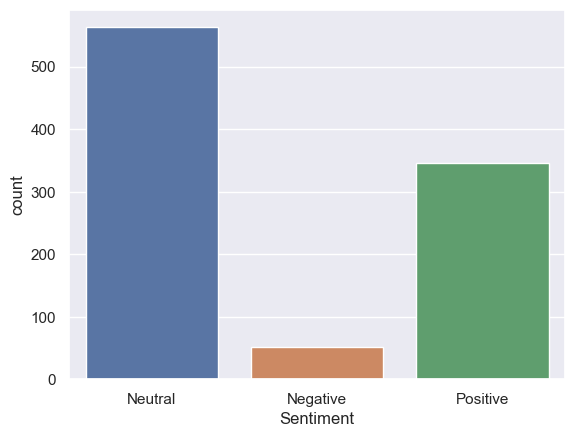

In [85]:
plot_sentiment_distribution(release_df, 'Sentiment')

<a id='all'></a>
<font size="+3" color='#780404'><b> All Tweets</b></font>  
[back to top](#table-of-contents)  

In [86]:
all_df['comment'] = all_df.comment.apply(text_preproc)
all_df['comment'] = clean_column(all_df['comment'])
all_df['comment'] = all_df.comment.apply(emoji_converter)
all_df['Sentiment'] = all_df['comment'].apply(get_sentiment_label)

#### Users Sentiments in all artists postt data combined

In [87]:
all_df['Sentiment'].value_counts()

Neutral     1413
Positive     737
Negative     108
Name: Sentiment, dtype: int64

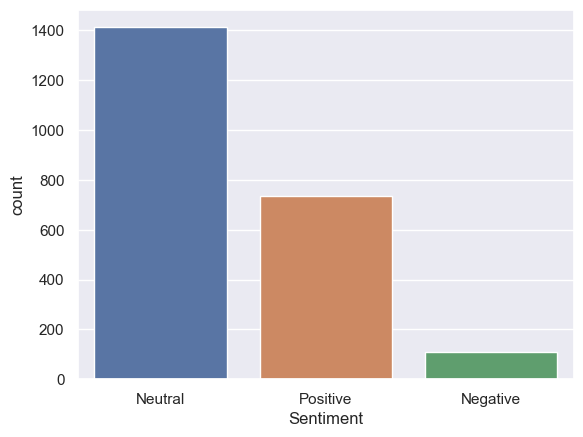

In [88]:
plot_sentiment_distribution(all_df, 'Sentiment')

#### Saving files for dashboard

In [89]:
announcement_df.to_csv('tiktok_all_pre_tweets.csv')
release_df.to_csv('tiktok_all_post_tweets.csv')
all_df.to_csv('tiktok_all_tweets.csv')